In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import tensorflow as tf
tf.compat.v1.disable_v2_behavior() 
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Activation

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
!unzip customer-churn-prediction-2020.zip

Archive:  customer-churn-prediction-2020.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
df = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

# DATA PREPROCESSING

In [ ]:
# dropping Customer ID Column
df.drop(["state", "account_length"], axis=1, inplace=True)
df_test.drop(["state", "account_length"], axis=1, inplace=True)

In [ ]:
# Impue NULL valued examples from the dataset
df.isnull().sum()

area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   area_code                      4250 non-null   object 
 1   international_plan             4250 non-null   object 
 2   voice_mail_plan                4250 non-null   object 
 3   number_vmail_messages          4250 non-null   int64  
 4   total_day_minutes              4250 non-null   float64
 5   total_day_calls                4250 non-null   int64  
 6   total_day_charge               4250 non-null   float64
 7   total_eve_minutes              4250 non-null   float64
 8   total_eve_calls                4250 non-null   int64  
 9   total_eve_charge               4250 non-null   float64
 10  total_night_minutes            4250 non-null   float64
 11  total_night_calls              4250 non-null   int64  
 12  total_night_charge             4250 non-null   f

1. area_code - obj
2. international_plan - obj
3. voice_mail_plan - obj
4. churn - obj

We need to encode these into numerical data

In [ ]:
df['area_code'].value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse = False)
df[enc.categories_[0]] = enc.fit_transform(np.array(df['area_code']).reshape(-1, 1))
df_test[enc.categories_[0]] = enc.fit_transform(np.array(df_test['area_code']).reshape(-1, 1))

In [ ]:
df.drop(['area_code'], axis = 1, inplace = True)
df_test.drop(['area_code'], axis = 1, inplace = True)

In [ ]:
df['international_plan'] = (df['international_plan']=='yes').astype(float)
df_test['international_plan'] = (df_test['international_plan']=='yes').astype(float)
df['voice_mail_plan'] = (df['voice_mail_plan']=='yes').astype(float)
df_test['voice_mail_plan'] = (df_test['voice_mail_plan']=='yes').astype(float)

In [ ]:
X = df.drop(['churn'], axis = 1)
y = df['churn']

# HANDLING CLASS IMBALANCES

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
y.value_counts()

no     3652
yes    3652
Name: churn, dtype: int64

# CREATE THE TRAIN AND TEST SETS

In [ ]:
y = y.apply(lambda x:(x=='yes')).astype(float)

In [ ]:
# Perform the Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=99)

In [ ]:
X_train.shape

(5843, 19)

In [ ]:
y_train

992     0.0
441     0.0
2336    0.0
2034    0.0
2748    0.0
       ... 
1737    0.0
3240    0.0
5305    1.0
7203    1.0
4737    1.0
Name: churn, Length: 5843, dtype: float64

# DEEP FEED-FORWARD NEURAL NETWORK

In [ ]:
model = keras.Sequential(
    [
        Dense(32, input_dim=19, activation="relu"),
        # Dropout(0.2),
        Dense(16, activation="relu"),
        # Dropout(0.3),
        Dense(8, activation="relu"),
        # Dropout(0.5),
        Dense(1, activation="sigmoid")
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                640       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["binary_accuracy"])

In [ ]:
# finally fit the model on the data

hist = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=15
)

Train on 5843 samples
Epoch 1/100
5843/5843 [==============================] - 1s 136us/sample - loss: 1.2119 - binary_accuracy: 0.5632
Epoch 2/100
5843/5843 [==============================] - 0s 81us/sample - loss: 0.6682 - binary_accuracy: 0.6401
Epoch 3/100
5843/5843 [==============================] - 0s 85us/sample - loss: 0.7116 - binary_accuracy: 0.6432
Epoch 4/100
5843/5843 [==============================] - 0s 78us/sample - loss: 0.6653 - binary_accuracy: 0.6656
Epoch 5/100
5843/5843 [==============================] - 0s 83us/sample - loss: 0.5802 - binary_accuracy: 0.7003
Epoch 6/100
5843/5843 [==============================] - 0s 75us/sample - loss: 0.5699 - binary_accuracy: 0.7079
Epoch 7/100
5843/5843 [==============================] - 0s 81us/sample - loss: 0.5601 - binary_accuracy: 0.7258
Epoch 8/100
5843/5843 [==============================] - 0s 75us/sample - loss: 0.5733 - binary_accuracy: 0.7224
Epoch 9/100
5843/5843 [==============================] - 1s 93us/sample -

# SVM CLASSIFIER

In [ ]:
from sklearn import svm
clf = svm.SVC(C=100, kernel="poly", verbose=True, degree=5)
clf.fit(X_train, y_train)

[LibSVM]

SVC(C=100, degree=5, kernel='poly', verbose=True)

In [ ]:
clf.predict(X_test)

array([1., 0., 0., ..., 0., 1., 1.])

#EVALUATIONS

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

In [ ]:
y_train_pred = [round(y_pred[0]) for y_pred in model.predict(X_train)]
y_test_pred = [round(y_pred[0]) for y_pred in model.predict(X_test)]

print("ACCURACY ON TRAIN SET: ", accuracy_score(y_train, y_train_pred))
print("ACCURACY ON TEST SET: ", accuracy_score(y_test, y_test_pred))

ACCURACY ON TRAIN SET:  0.8567516686633578
ACCURACY ON TEST SET:  0.8425735797399042


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


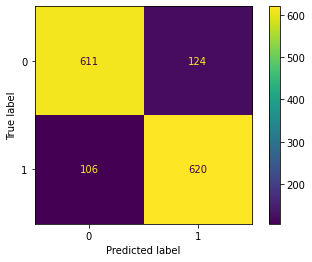

In [ ]:
conf_mat = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       735
         1.0       0.83      0.85      0.84       726

    accuracy                           0.84      1461
   macro avg       0.84      0.84      0.84      1461
weighted avg       0.84      0.84      0.84      1461



In [ ]:
y_train_pred = [int(y_pred>0.5) for y_pred in clf.predict(X_train)]
y_test_pred = [int(y_pred>0.5) for y_pred in clf.predict(X_test)]

print("ACCURACY ON TRAIN SET: ", accuracy_score(y_train, y_train_pred))
print("ACCURACY ON TEST SET: ", accuracy_score(y_test, y_test_pred))

ACCURACY ON TRAIN SET:  0.8305664898168749
ACCURACY ON TEST SET:  0.8186173853524983


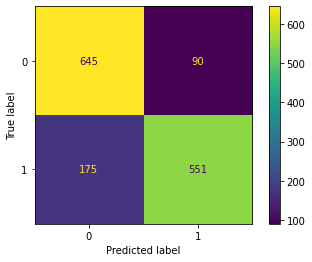

In [ ]:
conf_mat = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       735
         1.0       0.86      0.76      0.81       726

    accuracy                           0.82      1461
   macro avg       0.82      0.82      0.82      1461
weighted avg       0.82      0.82      0.82      1461



# SHAP EXPLANATIONS

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.3 MB/s 


In [ ]:
import shap

# SHAP expects model functions to take a 2D numpy array as input, 
# so we define a wrapper function around the original Keras predict function

def prediction_wrapper(X):
  return model.predict([X[:,i] for i in range(X.shape[0])]).flatten()

In [ ]:
# select a set of background examples to take an expectation over
background = X_train.iloc[np.random.choice(X_train.shape[0], 100, replace=False)]

explainer = shap.DeepExplainer(
    (model.layers[0].input, model.layers[-1].output), background
)
shap_values = explainer.shap_values(X_test[:].values) 

# print the JS visualization code to the notebook

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.



In [ ]:
shap.initjs()
shap.force_plot(
    explainer.expected_value[0], shap_values[0], feature_names=X_train.columns
)

In [ ]:
# Negative Sample
shap.initjs()
shap.force_plot(
    explainer.expected_value[0], shap_values[0][1], feature_names=X_train.columns
)

In [ ]:
# Positive Sample
shap.initjs()
shap.force_plot(
    explainer.expected_value[0], shap_values[0][10], feature_names=X_train.columns
)

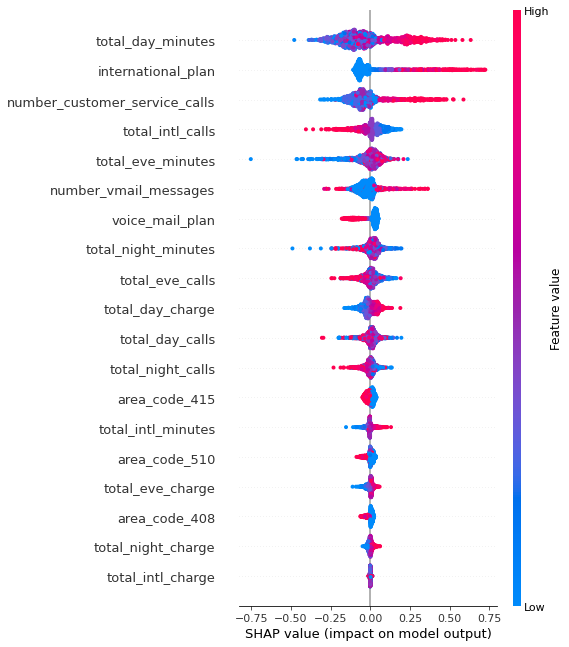

In [ ]:
shap.summary_plot(shap_values[0],X_test)
# shap_values

# PDP EXPLANATIONS

In [ ]:
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 1.4 MB/s 
     |████████████████████████████████| 13.1 MB 44.9 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=56a9ee4ea9d5bc6f0ab81582976c825acd5c4bd288fb6b2f82fd133fd1041e01
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=305f01c30870c0207ccd356ceb08cbb47b8b59cc0eb70184fd99b9113a17e286
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pdpbox sklearn
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7304 entries, 0 to 7303
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   international_plan             7304 non-null   float64
 1   voice_mail_plan                7304 non-null   float64
 2   number_vmail_messages          7304 non-null   int64  
 3   total_day_minutes              7304 non-null   float64
 4   total_day_calls                7304 non-null   int64  
 5   total_day_charge               7304 non-null   float64
 6   total_eve_minutes              7304 non-null   float64
 7   total_eve_calls                7304 non-null   int64  
 8   total_eve_charge               7304 non-null   float64
 9   total_night_minutes            7304 non-null   float64
 10  total_night_calls              7304 non-null   int64  
 11  total_night_charge             7304 non-null   float64
 12  total_intl_minutes             7304 non-null   f

In [ ]:
from pdpbox import pdp, info_plots

features = ["international_plan", "voice_mail_plan", "number_vmail_messages", "total_day_minutes", "total_day_calls", "total_day_charge", "total_eve_minutes", "total_eve_calls", "total_eve_charge", "total_night_minutes", "total_night_calls", "total_night_charge", "total_intl_minutes", "total_intl_calls", "total_intl_charge", "number_customer_service_calls", "area_code_408", "area_code_415", "area_code_510"]

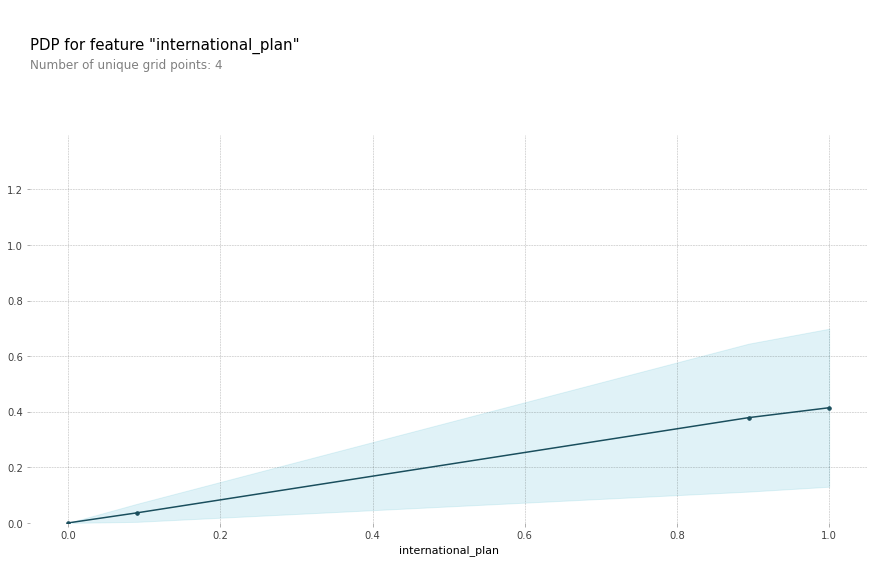

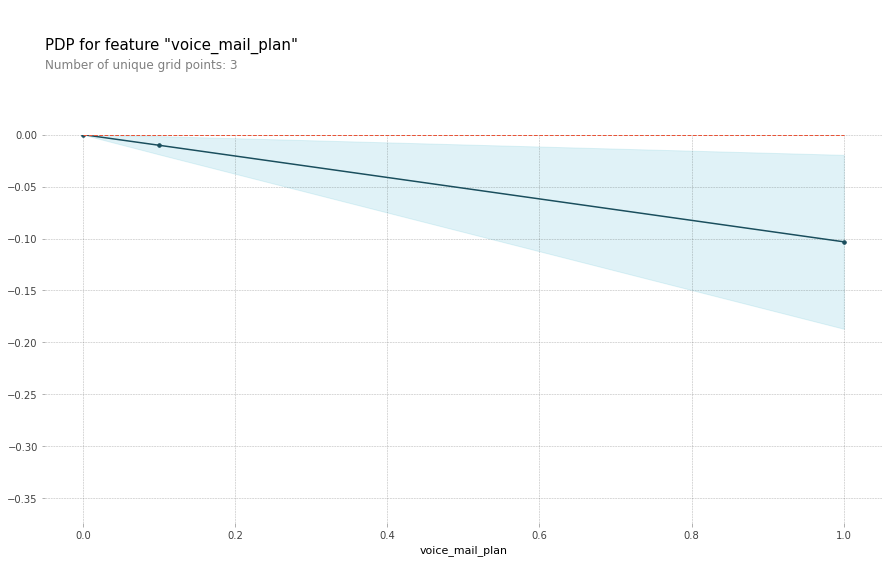

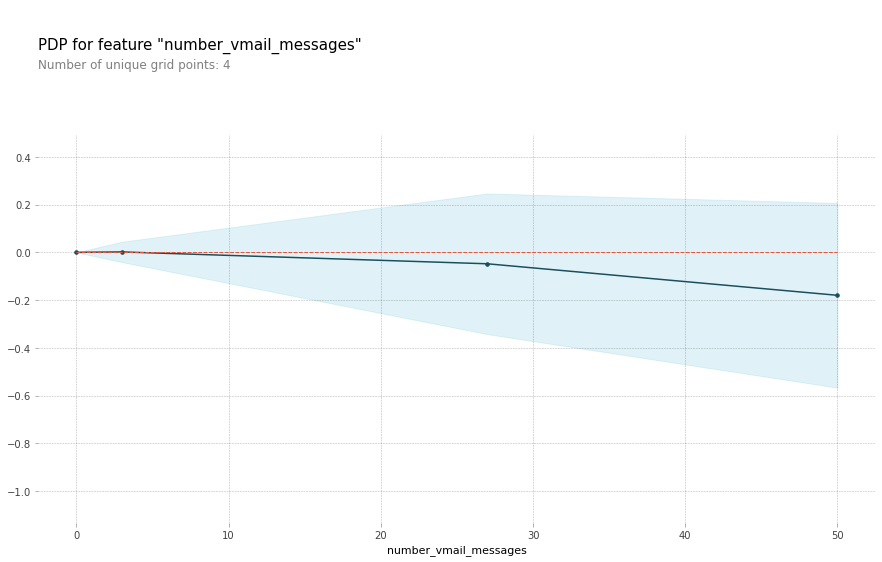

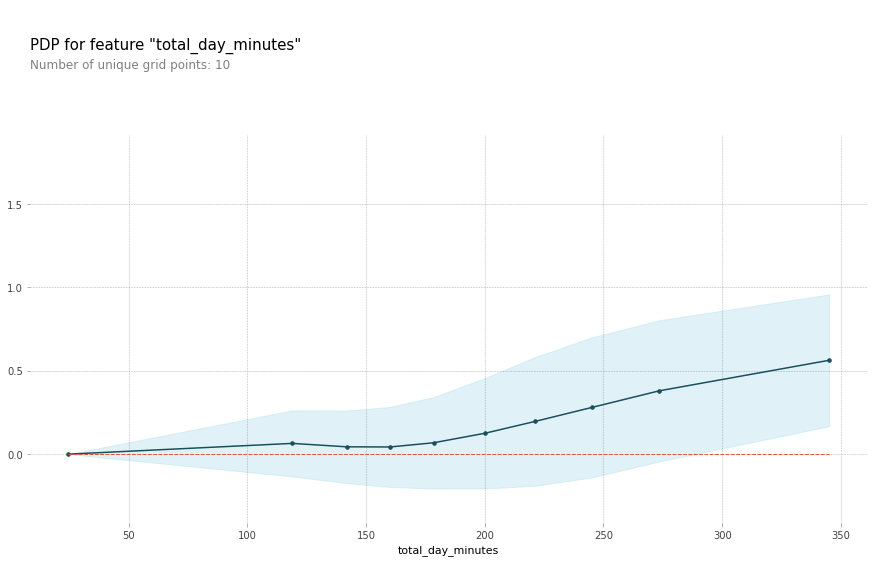

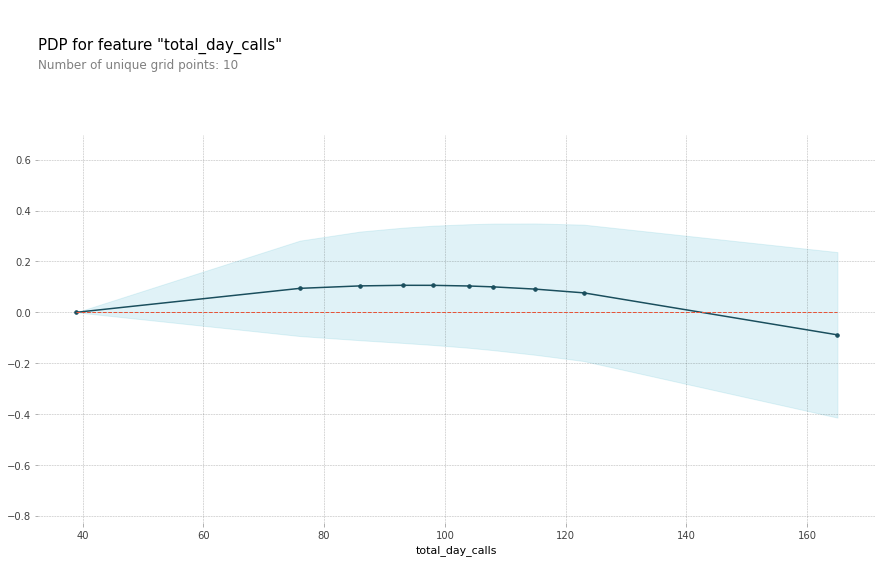

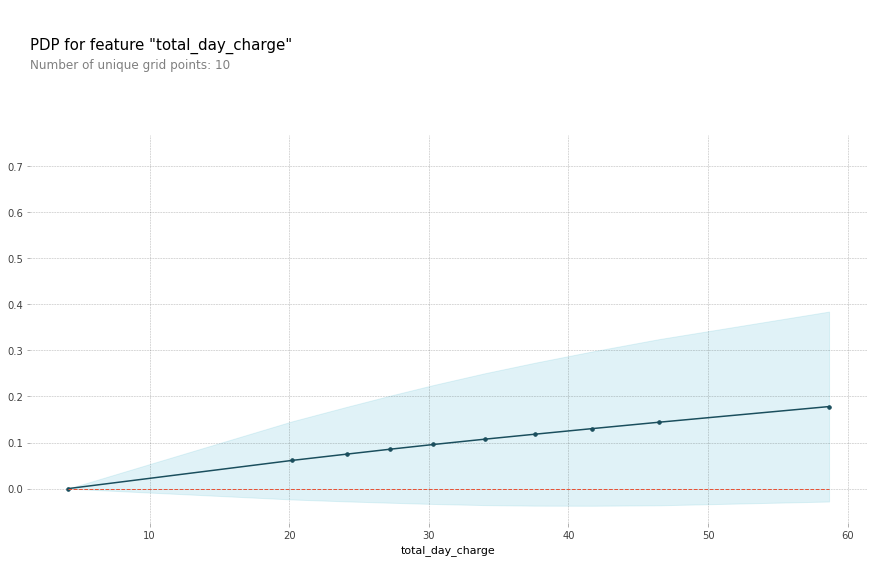

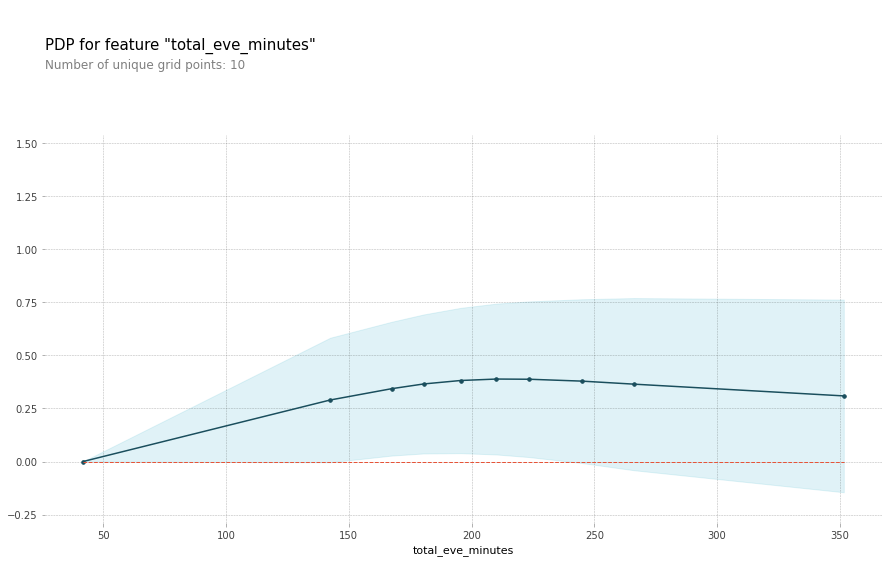

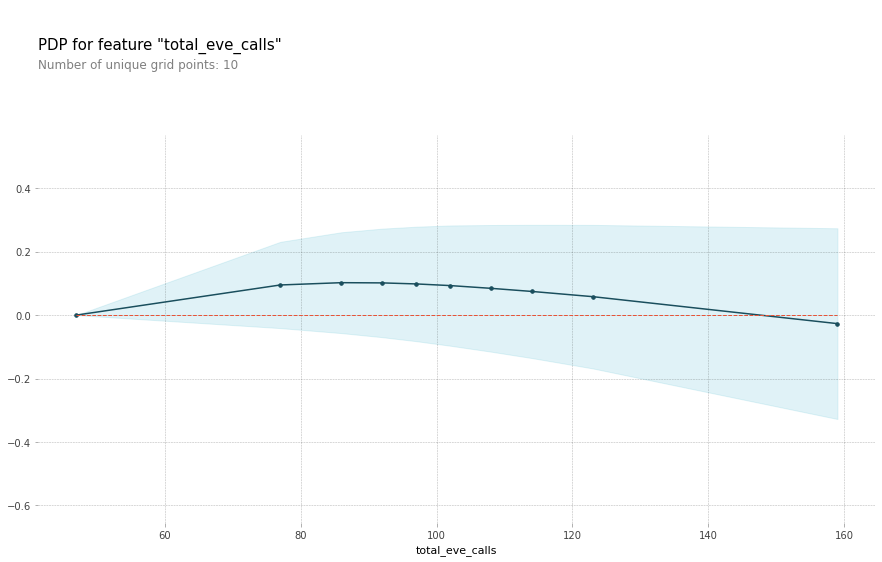

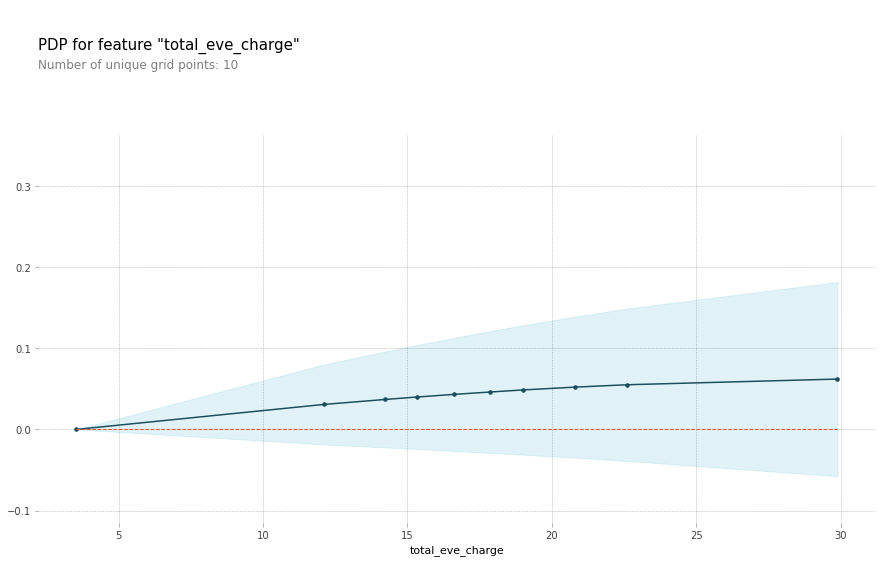

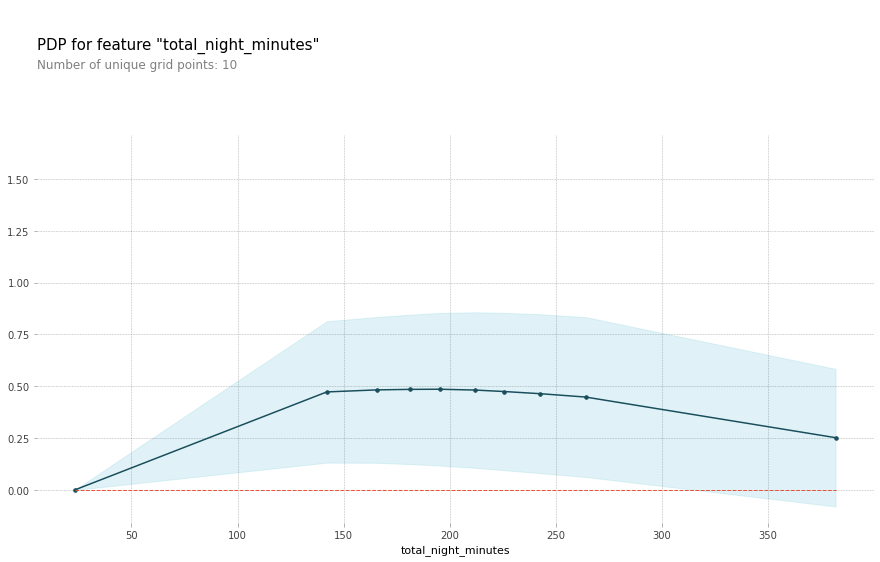

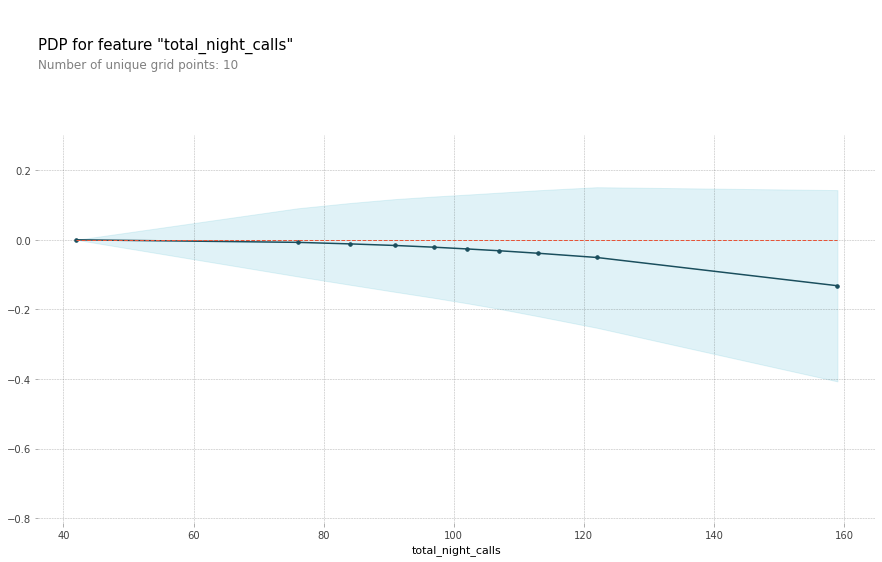

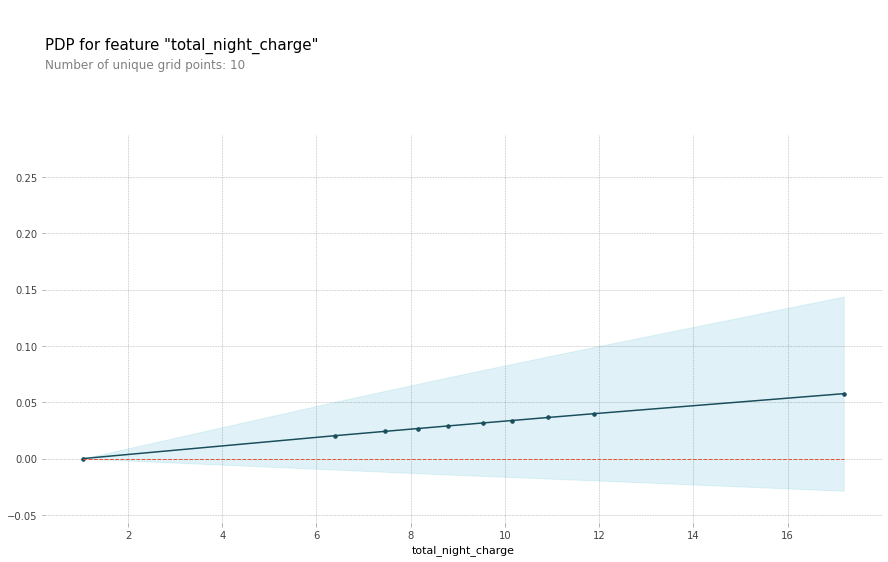

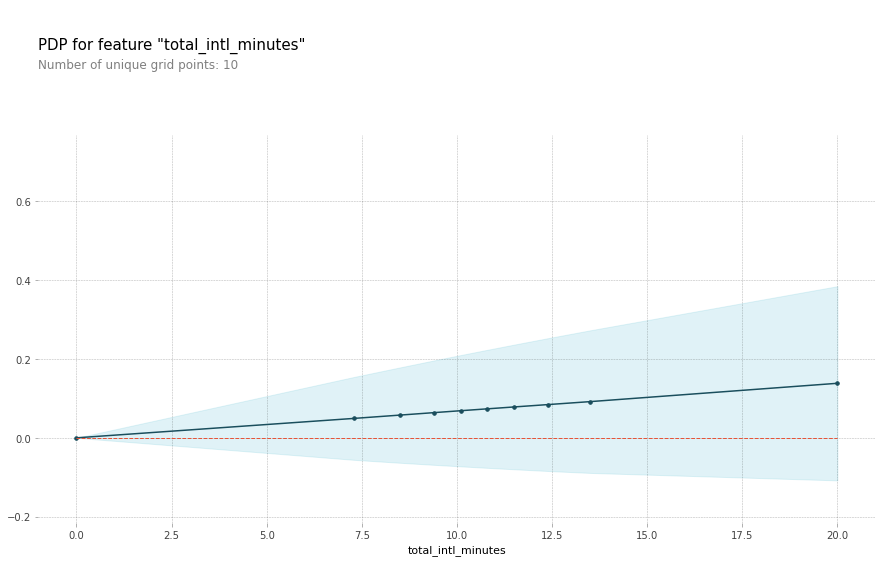

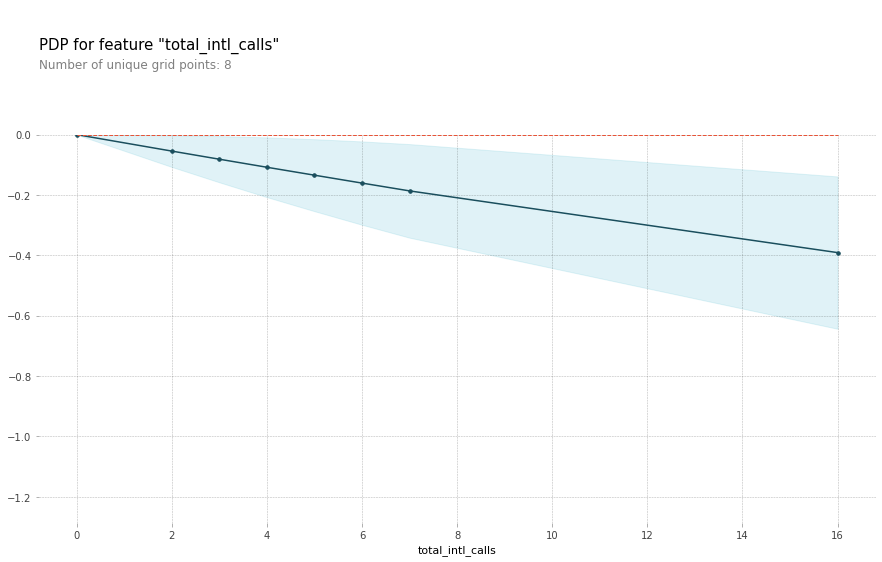

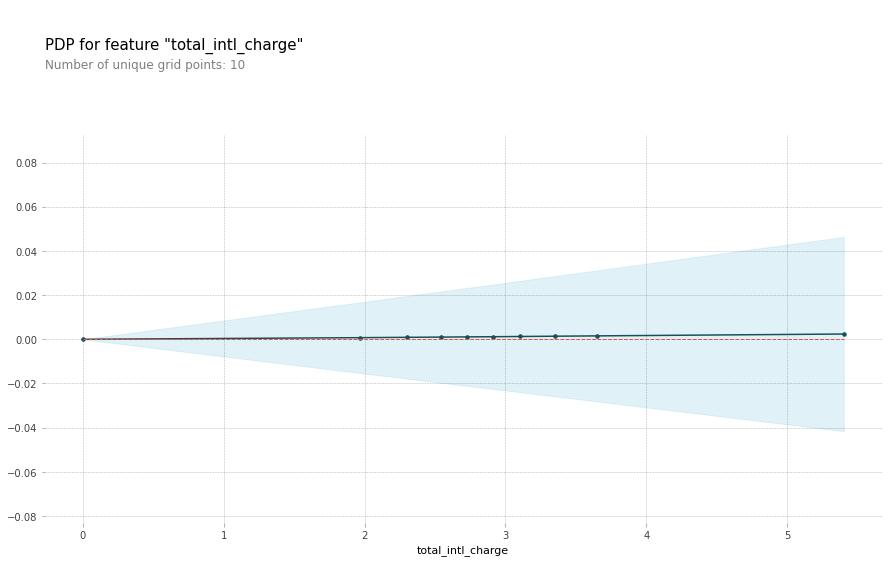

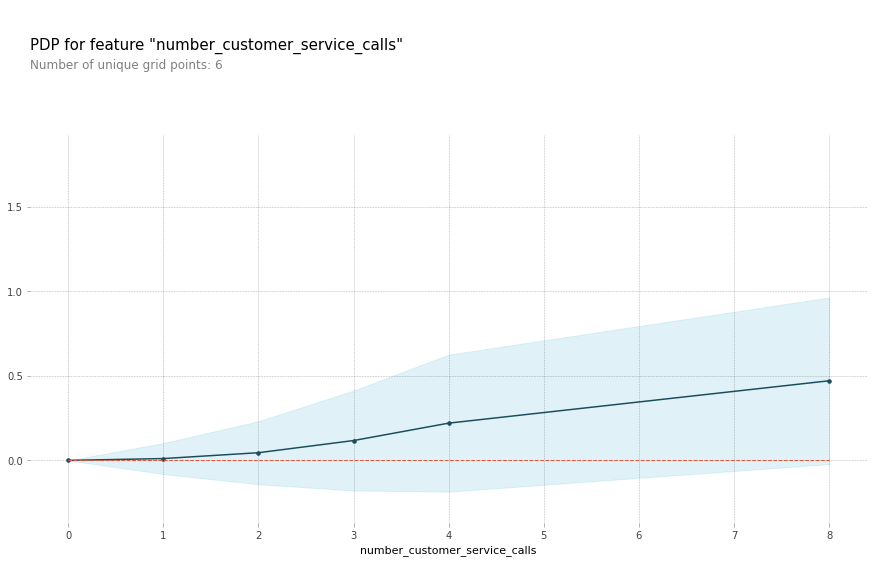

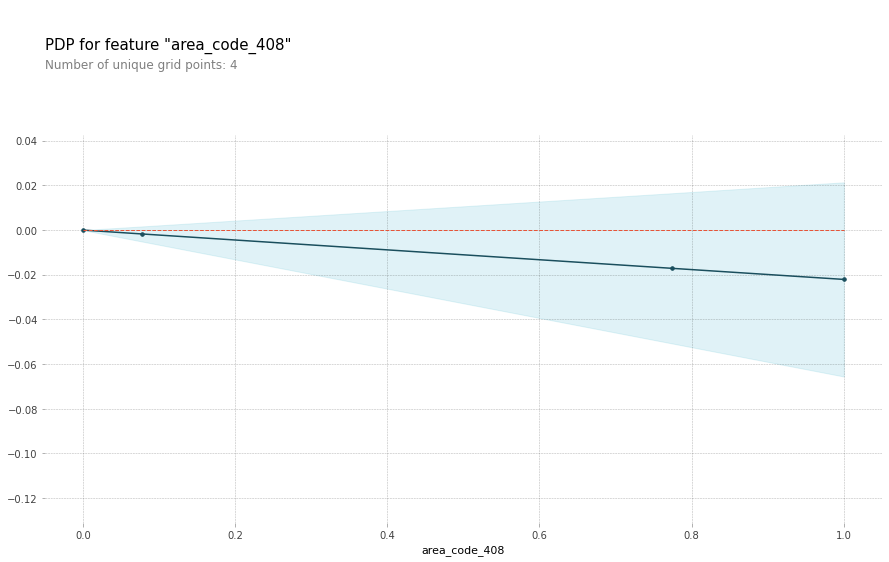

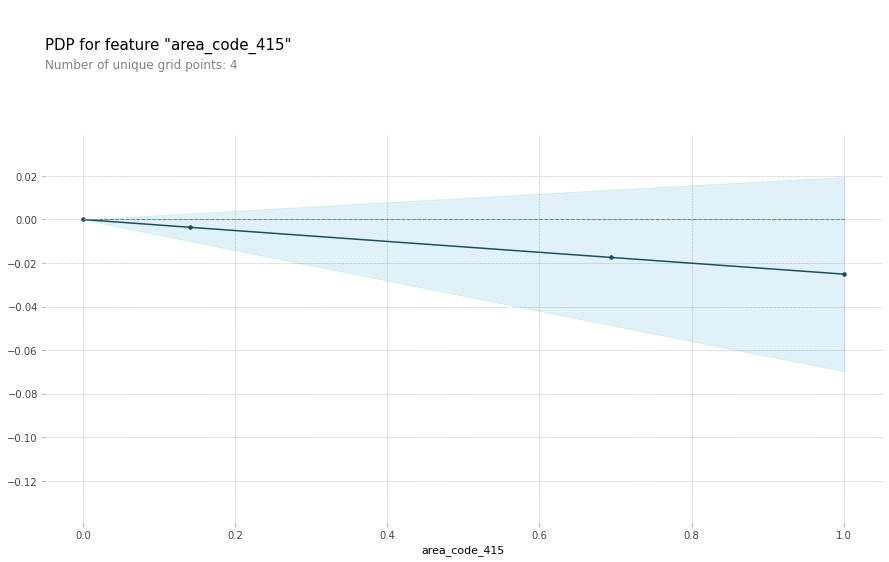

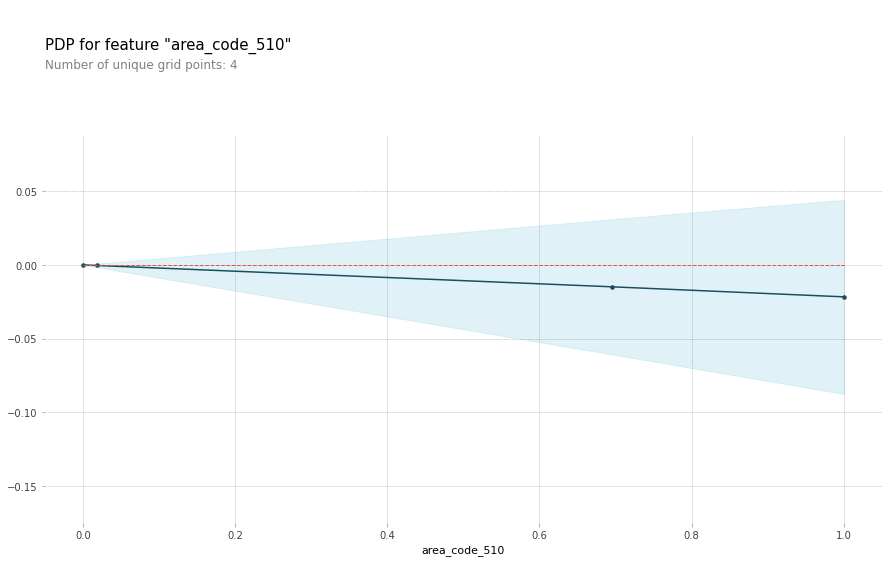

In [ ]:
for feature_name in features:
    # Create the data that we will plot
    pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X_train.columns.tolist(), feature=feature_name);

    # plot it
    pdp.pdp_plot(pdp_goals, feature_name);
    plt.show();

# CAUSAL ANALYSIS

In [ ]:
!pip install cdt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 921 kB 5.9 MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7409 sha256=254e7e7d8d257c15be058506b3b8c69ddb128f4e7f95ce247141c60f16c70ece
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29269 sha256=40ae221d060db770f02892cacede32eec050c55426d2e650343a323016564ddf
  Stored in directory: /root/.cache/pip/wheels/4f/3b/07/22a9a01f3f25cd376122b5ef526737a44993b4c312e50916ed
Successfully built GPUtil skrebate


In [ ]:
!sudo add-apt-repository ppa:dns/gnu
!sudo apt-get update
!sudo apt install libgsl-dev

 .: In this PPA you can find new releases & backports of a few GNU packages :.

PACKAGE NAME . | SHORT DESCRIPTION . . . . . | HOMEPAGE / MORE INFO
===============|=============================|===============================
autoconf-archive . . .Autoconf Macro Archive | https://kutt.it/cbtcyr
---------------|-----------------------------|-------------------------------
autogen. . . . | Automated Text/Program Gen. | https://gnu.org/s/autogen
---------------|-----------------------------|-------------------------------
automake . . . | Auto generating Makefile.in | https://gnu.org/s/automake
---------------|-----------------------------|-------------------------------
binutils . . . | GNU binary utilities. . . . | https://gnu.org/s/binutils
---------------|-----------------------------|-------------------------------
bison. . . . . | Compatible Parser Generator | https://gnu.org/s/bison
---------------|-----------------------------|-------------------------------
cflow. . . . . | Contr

In [46]:
!Rscript setup.r

Streaming output truncated to the last 5000 lines.
/usr/local/lib/R/site-library/RcppEigen/include/Eigen/src/Core/Block.h:154:7:   [ skipping 13 instantiation contexts, use -ftemplate-backtrace-limit=0 to disable ]
/usr/local/lib/R/site-library/RcppEigen/include/Eigen/src/Core/NoAlias.h:58:31:   required from ‘ExpressionType& Eigen::NoAlias<ExpressionType, StorageBase>::operator-=(const StorageBase<OtherDerived>&) [with OtherDerived = Eigen::Product<Eigen::Block<Eigen::Block<Eigen::Map<Eigen::Matrix<double, -1, -1>, 0, Eigen::Stride<0, 0> >, -1, -1, false>, -1, -1, false>, Eigen::Block<Eigen::Block<Eigen::Map<Eigen::Matrix<double, -1, -1>, 0, Eigen::Stride<0, 0> >, -1, -1, false>, -1, -1, false>, 0>; ExpressionType = Eigen::Block<Eigen::Block<Eigen::Map<Eigen::Matrix<double, -1, -1>, 0, Eigen::Stride<0, 0> >, -1, -1, false>, -1, -1, false>; StorageBase = Eigen::MatrixBase]’
/usr/local/lib/R/site-library/RcppEigen/include/Eigen/src/LU/PartialPivLU.h:492:23:   required from ‘static Eigen

In [47]:
df = pd.read_csv("/content/train.csv")
df.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

In [48]:
# drop all categorical features and convert non-numeric features to numeric
df.drop(['state', 'area_code', 'voice_mail_plan', 'international_plan'], axis=1, inplace = True)
df['churn'] = (df['churn']=='yes').astype(int)

In [49]:
import pickle
import cdt
import networkx as nx
import matplotlib.pyplot as plt

In [50]:
cdt.SETTINGS.rpath = "/usr/bin/Rscript"
cdt.utils.R.DefaultRPackages.pcalg = True
cdt.utils.R.DefaultRPackages.kpcalg = True
cdt.utils.R.DefaultRPackages.RCIT = True

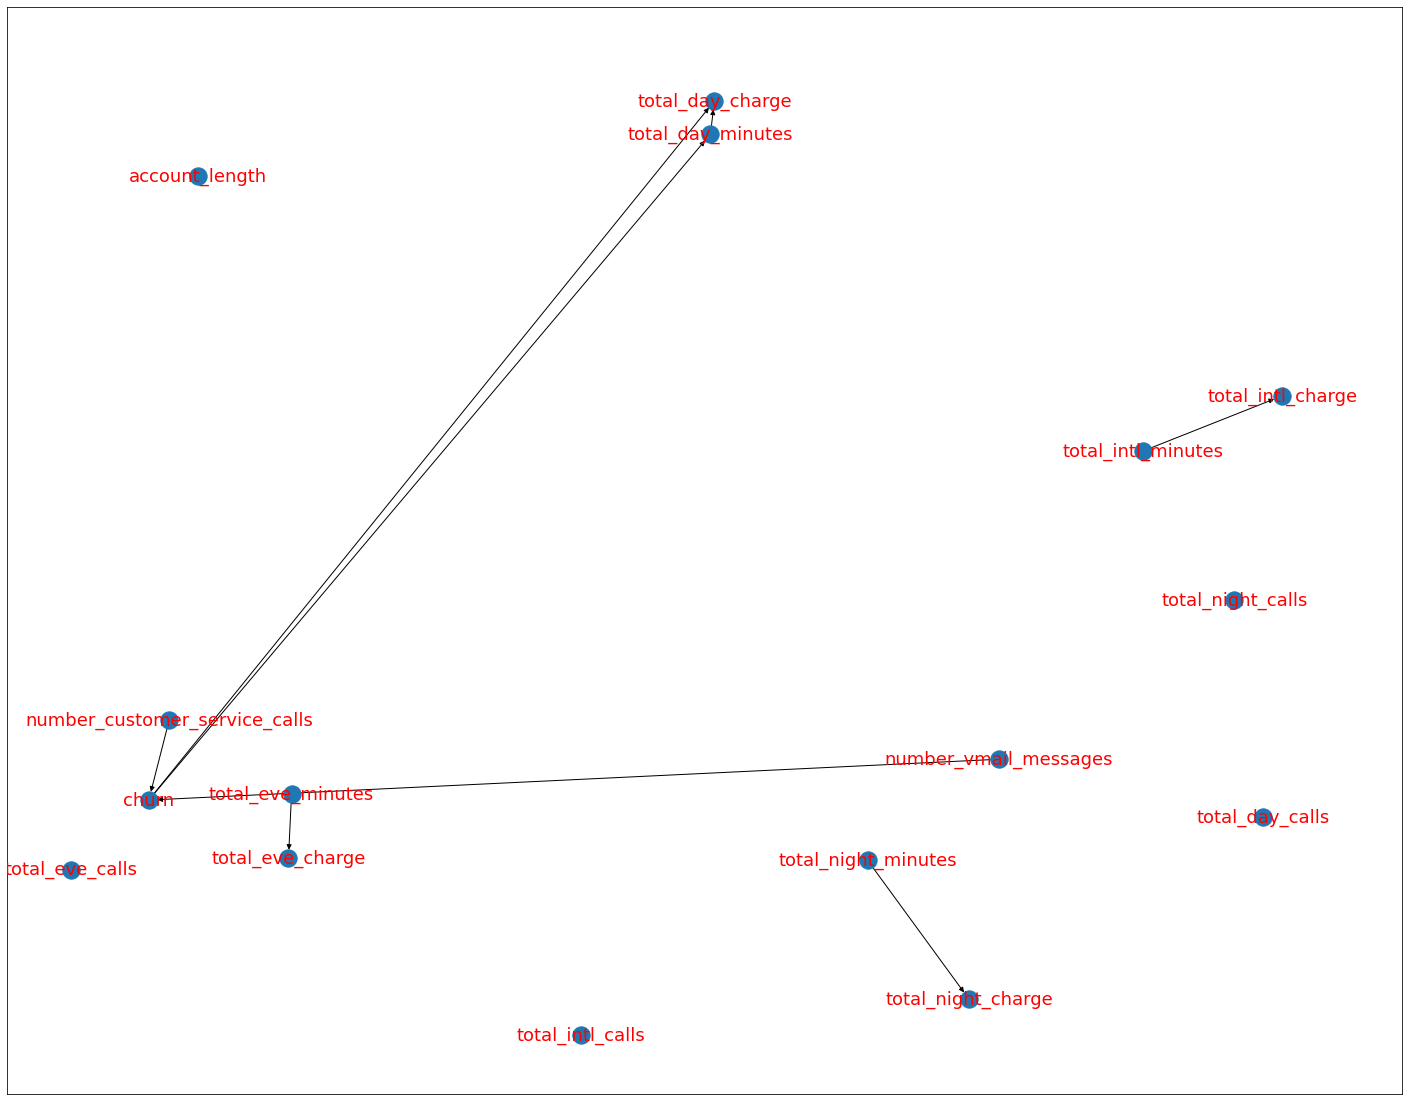

In [51]:
# Estimated Causality Graph

# LiNGAM Algorithm
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(df)

# visualize network
fig=plt.figure(figsize=(25,20))
nx.draw_networkx(graph_lingam, font_size=18, font_color='r')